## Import necessary libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_data = pd.read_csv("netflix1.csv")

In [3]:
netflix_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
netflix_data.shape

(8790, 10)

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
netflix_data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
netflix_data.isnull().sum()  # Checking for missing values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

# Exploratory Data Analysis (EDA)

## Content Type Distribution (Movies vs TV Shows)

In [25]:
content_type = netflix_data['type'].value_counts()

In [14]:
content_type

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10604\3181933400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_type.index, y=content_type.values, palette='coolwarm')


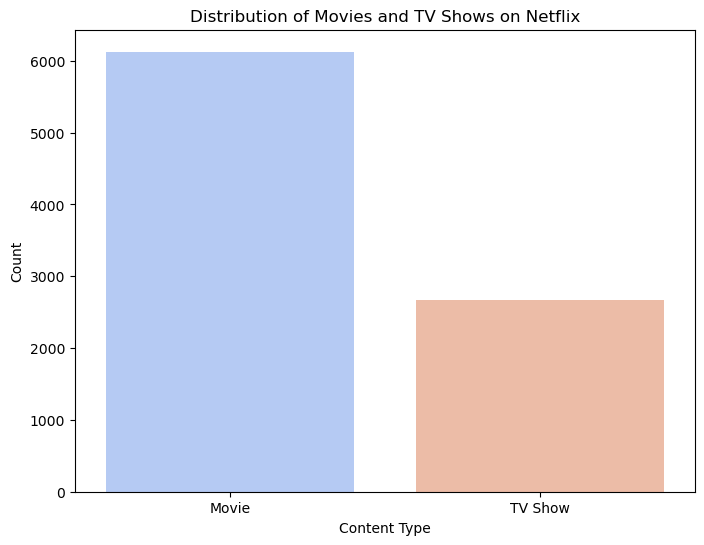

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x=content_type.index, y=content_type.values, palette='coolwarm')
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

## Yearly Content Addition

In [23]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['year_added'] = netflix_data['date_added'].dt.year

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10604\2052314926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=netflix_data, palette='viridis', order=netflix_data['year_added'].value_counts().index)


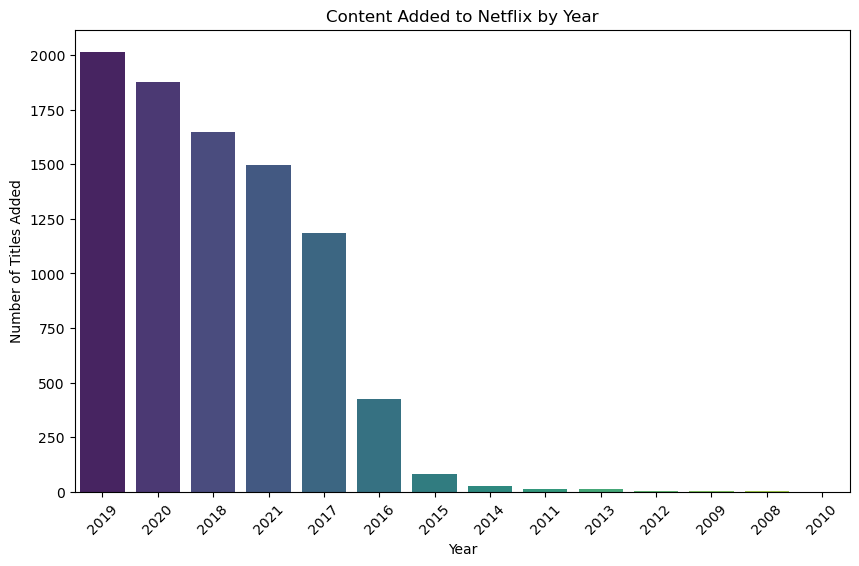

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='year_added', data=netflix_data, palette='viridis', order=netflix_data['year_added'].value_counts().index)
plt.title('Content Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()

## Top 10 Countries Producing Netflix Content

In [26]:
netflix_data['country'] = netflix_data['country'].fillna('Unknown')
netflix_countries = netflix_data.assign(country=netflix_data['country'].str.split(', ')).explode('country')

In [27]:
top_countries = netflix_countries['country'].value_counts().head(10)

In [29]:
top_countries

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10604\543073086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')


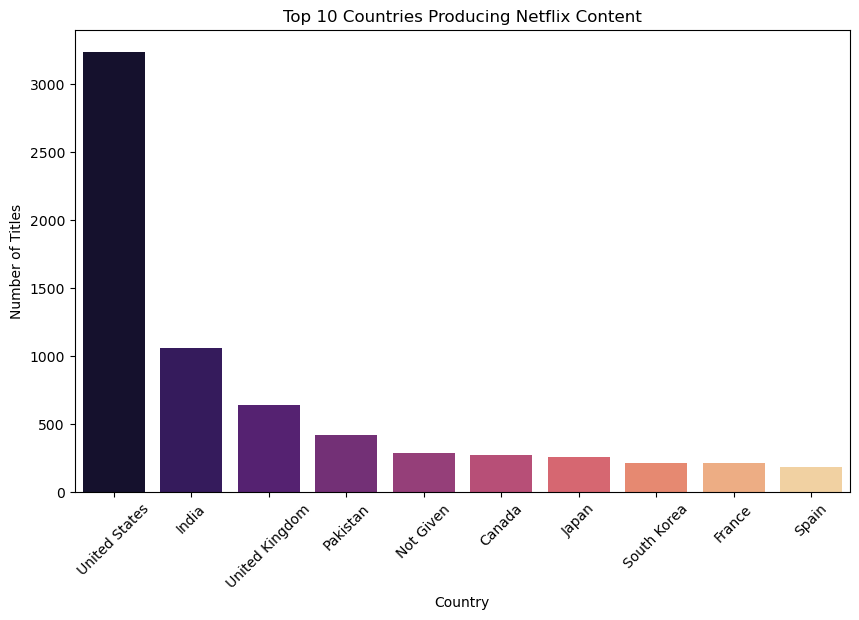

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

## Distribution of Netflix Content Ratings

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10604\2825832897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='cubehelix')


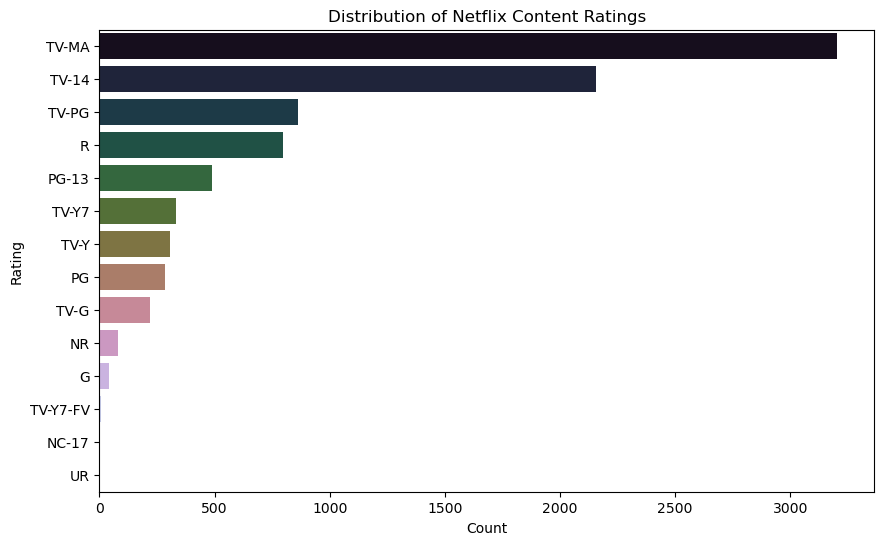

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(y='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='cubehelix')
plt.title('Distribution of Netflix Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

## Genre Analysis

In [31]:
netflix_data['listed_in'] = netflix_data['listed_in'].fillna('Unknown')
netflix_genres = netflix_data.assign(listed_in=netflix_data['listed_in'].str.split(', ')).explode('listed_in')

In [32]:
top_genres = netflix_genres['listed_in'].value_counts().head(10)

In [34]:
top_genres

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10604\1864344095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='Paired')


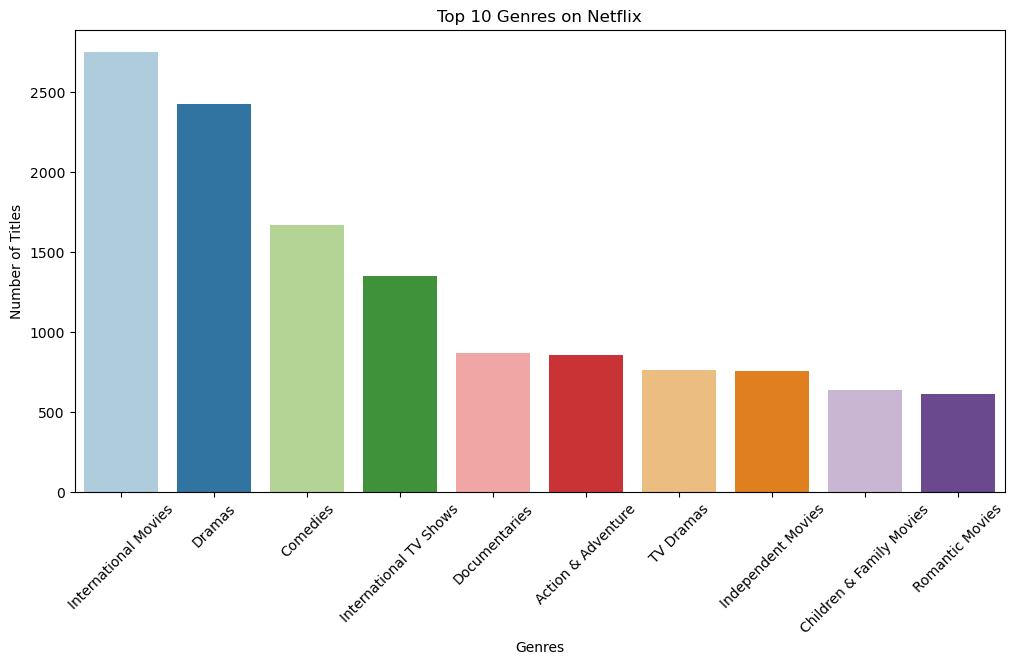

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='Paired')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

## Duration Analysis

In [35]:
netflix_data['duration'] = netflix_data['duration'].str.extract('(\d+)').astype(float)

In [36]:
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

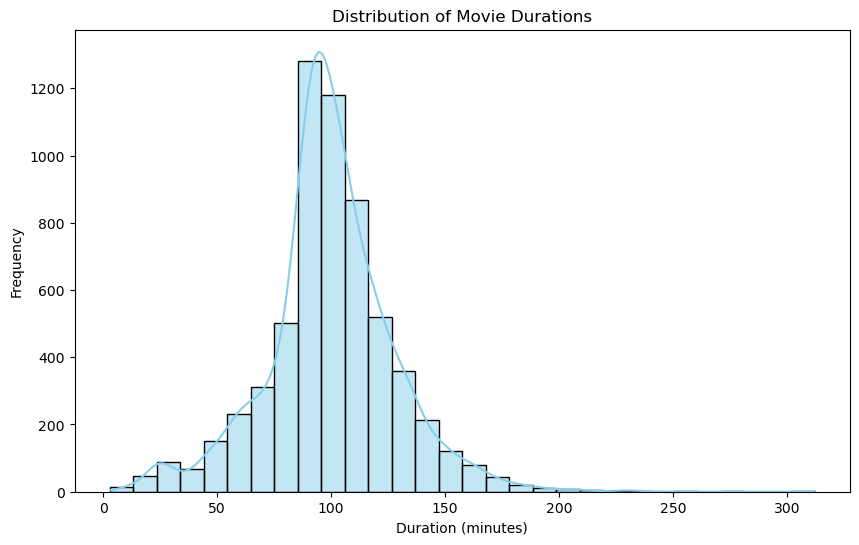

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(movies['duration'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10604\95354633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration'] = tv_shows['duration'].fillna(0)  # Filling missing seasons


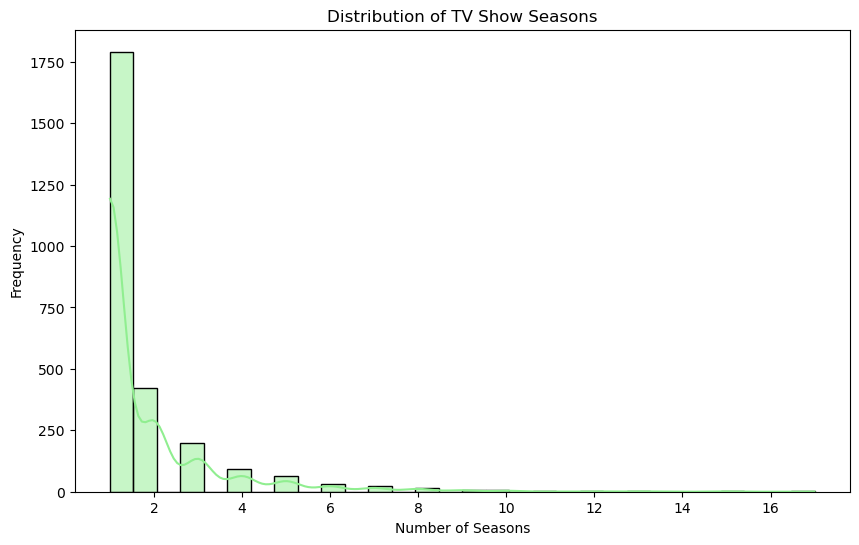

In [38]:
tv_shows['duration'] = tv_shows['duration'].fillna(0)
plt.figure(figsize=(10,6))
sns.histplot(tv_shows['duration'], kde=True, color='lightgreen', bins=30)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()

## Content Trends Over Time by Genre and Type

In [39]:
netflix_genres['year_added'] = netflix_data['year_added']
content_trends = netflix_genres.groupby(['year_added', 'listed_in']).size().reset_index(name='count')

In [40]:
top_genres_list = top_genres.index.tolist()
filtered_trends = content_trends[content_trends['listed_in'].isin(top_genres_list)]

In [43]:
top_genres_list

['International Movies',
 'Dramas',
 'Comedies',
 'International TV Shows',
 'Documentaries',
 'Action & Adventure',
 'TV Dramas',
 'Independent Movies',
 'Children & Family Movies',
 'Romantic Movies']

In [42]:
filtered_trends

,year_added,listed_in,count
0,2008,Dramas,1
1,2008,Independent Movies,1
4,2009,Dramas,1
6,2009,International Movies,1
9,2011,Children & Family Movies,1
...,...,...,...
304,2021,Independent Movies,89
305,2021,International Movies,408
306,2021,International TV Shows,229
313,2021,Romantic Movies,114


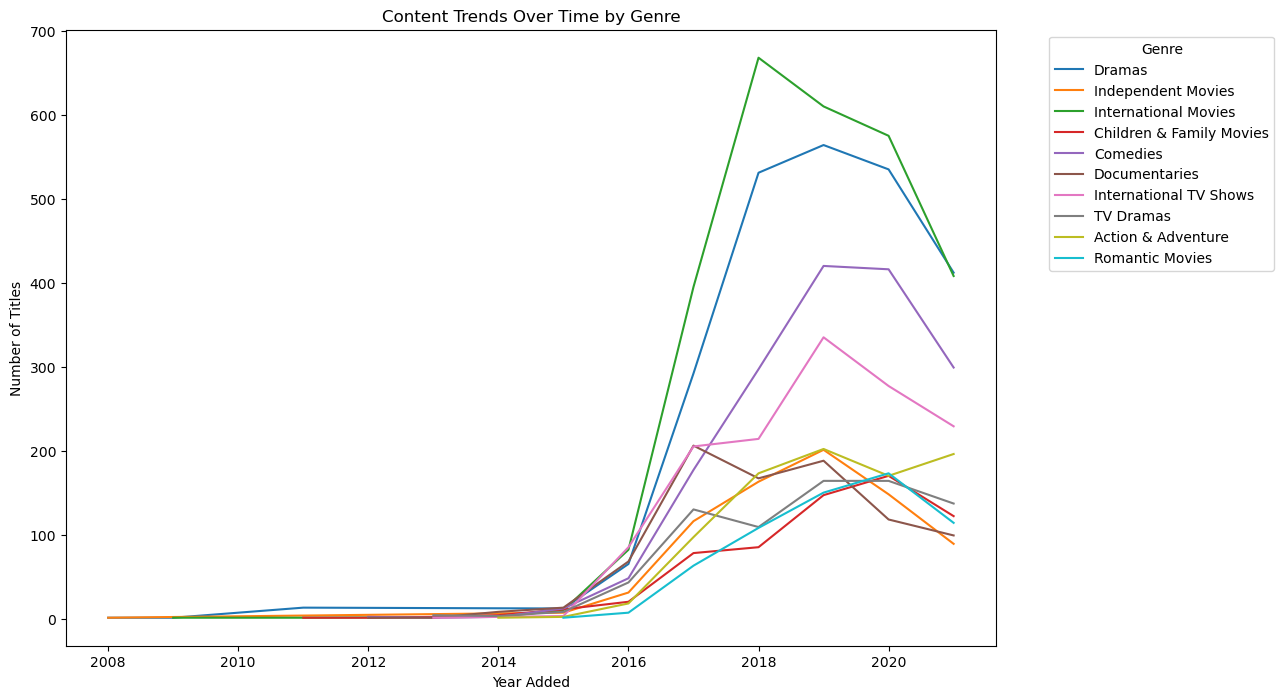

In [41]:
plt.figure(figsize=(12,8))
sns.lineplot(x='year_added', y='count', hue='listed_in', data=filtered_trends, palette='tab10')
plt.title('Content Trends Over Time by Genre')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Comparing Content Types Across Countries

In [44]:
content_by_country_type = netflix_countries.groupby(['country', 'type']).size().unstack().fillna(0)

In [45]:
top_countries_list = top_countries.index.tolist()
filtered_country_type = content_by_country_type.loc[top_countries_list]

In [46]:
filtered_country_type

type,Movie,TV Show
country,,
United States,2395.0,845.0
India,976.0,81.0
United Kingdom,387.0,251.0
Pakistan,71.0,350.0
Not Given,257.0,30.0
Canada,187.0,84.0
Japan,87.0,172.0
South Korea,49.0,165.0
France,148.0,65.0


In [47]:
top_countries_list

['United States',
 'India',
 'United Kingdom',
 'Pakistan',
 'Not Given',
 'Canada',
 'Japan',
 'South Korea',
 'France',
 'Spain']

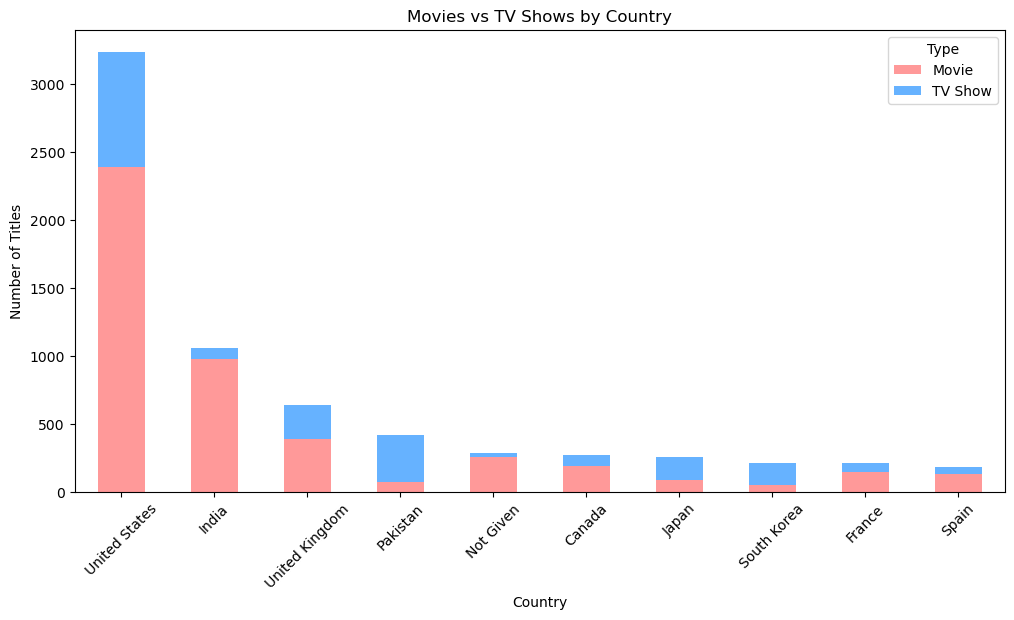

In [48]:
filtered_country_type.plot(kind='bar', stacked=True, figsize=(12,6), color=['#FF9999','#66B2FF'])
plt.title('Movies vs TV Shows by Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

# Netflix Dataset Analysis Report

## Data Overview
The Netflix dataset contains information on various movies and TV shows available on the platform. After loading the dataset, we handled missing values by filling or removing them for better analysis.

- **Total Entries**: 8790 rows, 10 columns
- **Content Types**: Movies, TV Shows

## Exploratory Data Analysis

### Content Type Distribution
We observed that **Movies** make up the majority of the content on Netflix, followed by TV Shows. This suggests that Netflix’s focus is more on movie content.

### Yearly Content Addition
The content library has significantly increased over the years, with a noticeable spike in content added between 2017 and 2021. The graph indicates the rapid expansion of Netflix's offerings in recent years.

### Top Content-Producing Countries
The top countries producing content for Netflix include the **United States**, **India**, and **United Kingdom**. The dominance of US-based content highlights Netflix’s origins and market focus, though international content is becoming more prominent.

### Content Ratings Distribution
The most common rating on Netflix is **TV-MA**, which indicates a large proportion of content is aimed at mature audiences. There is also significant content rated **TV-14**, appealing to a slightly younger audience.

### Genre Analysis
- The most common genres on Netflix include **International Movies**, **Dramas**, and **Comedies**.
- The diversity in genres suggests Netflix’s appeal to a broad and global audience.

### Duration Analysis
- Movies have an average duration of 90-120 minutes, with most movies falling in this range.
- TV Shows typically range between 1 to 3 seasons, although there are some long-running shows with more than 6 seasons.

### Content Trends Over Time
- The genre with the most growth over the years is **International Movies**, reflecting Netflix’s push for global expansion.
- **Comedies** saw a spike between 2018 and 2020, aligning with Netflix’s original stand-up specials.

### Movies vs TV Shows by Country
- The United States leads in both **Movies** and **TV Shows**, but countries like **India** and **United Kingdom** also contribute significantly to the movie content.

## Conclusion
This advanced analysis highlights Netflix's diverse and growing content library, emphasizing its global content strategy and focus on engaging, varied themes. The platform continues to expand both its movie and TV offerings, appealing to a wide range of audience segments across the globe. The analysis shows that Netflix's international presence is increasing, with certain genres like International Movies and Comedy gaining significant traction over the years.